### 합성곱 신경망   
CNN 클래스로 학습 및 검증을 구현하자

In [ ]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

train loss:2.295937919574106
=== epoch:1, train acc:0.131, test acc:0.155 ===
train loss:2.2935989260448717
train loss:2.285769482699653
train loss:2.2800153313230815
train loss:2.2652421008424324
train loss:2.24401418123409
train loss:2.2485549236763895
train loss:2.2017224863944125
train loss:2.1933577125921486
train loss:2.159963156915787
train loss:2.1215034453423764
train loss:2.0728903563885424
train loss:1.9856077997365305
train loss:1.90928374878767
train loss:1.8746745369481288
train loss:1.813955381824637
train loss:1.792993117745304
train loss:1.726076171464916
train loss:1.6658094399742303
train loss:1.4415529964937464
train loss:1.5156353595596446
train loss:1.2439182441132708
train loss:1.2636393995381396
train loss:1.2695859424157108
train loss:1.1687825193258115
train loss:1.1192225748799738
train loss:1.034858238662295
train loss:0.8957530880630493
train loss:1.0473767674029437
train loss:0.9013170161869963
train loss:0.8155781432012015
train loss:0.8080431014344192
tr

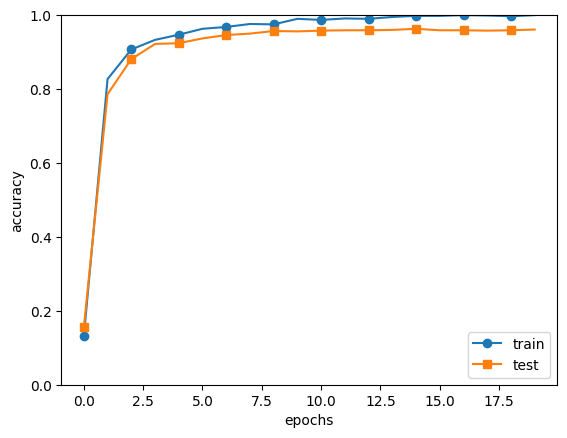

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch06.simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

# 7-3, 10-4-패딩1, 13-5, 21-7
filter_num = 500
filter_size = 10
pad = 1
stride = 4

network = SimpleConvNet(input_dim=(1, 28, 28), 
                 conv_param={'filter_num':filter_num, 'filter_size':filter_size, \
                            'pad':pad, 'stride':stride},
                 hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                    epochs=max_epochs, mini_batch_size=100,
                    optimizer='Adam', optimizer_param={'lr': 0.001},
                    evaluate_sample_num_per_epoch=1000)

trainer.train()

# 학습 전 무작위(랜덤)의 가중치 생성된 filter 표시
network.save_params("params.pkl")
print("Saved Network Parameters!")
print(f"""
filter_num:{filter_num}
filter_size:{filter_size}
pad: {pad}
stride: {stride}
""")

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0,1.0)
plt.legend(loc='lower right')
plt.show()